# Environment setting

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
sns.set()

# Import Data

In [2]:
loan_data_inputs_train = pd.read_csv('data/X_train_new.csv', index_col = 0)
loan_data_targets_train = pd.read_csv('data/y_train.csv', index_col = 0)
loan_data_inputs_test = pd.read_csv('data/X_test_new.csv', index_col = 0)
loan_data_targets_test = pd.read_csv('data/y_test.csv', index_col = 0)

In [3]:
loan_data_inputs_train.shape

(373028, 262)

In [4]:
loan_data_targets_train.shape

(373028, 1)

In [5]:
loan_data_inputs_test.shape

(93257, 262)

In [6]:
loan_data_targets_test.shape

(93257, 1)

# Selecting the Features

In [7]:
# Here we select a limited set of input variables in a new dataframe.
inputs_train_with_ref_cat = loan_data_inputs_train.loc[:, ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__ren_en__mov__house',
'purpose:oth__med__vacation_wed',
'purpose:major_purch__car__home_impr',
'purpose:credit_card',
'purpose:debt_consolidation',
'addr_state:ND_NE_IA_NV_FL_AL_HI',
'addr_state:NM_MO', 
'addr_state:PA_MI_AZ_TN_DE_UT_KY_AR',
'addr_state:NJ_MD_OK_NC_LA_VA', 
'addr_state:MN_OH_SD_GA',
'addr_state:MA_WA_IN', 
'addr_state:OR_RI_WI_ID',
'addr_state:IL_SC_CT_MS_KS', 
'addr_state:MT_CO_AK_VT_NH',
'addr_state:WV_WY_DC_ME', 
'addr_state:NY',
'addr_state:CA',
'addr_state:TX',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'months_since_issue_d:<38',
'months_since_issue_d:38-39',
'months_since_issue_d:40-41',
'months_since_issue_d:42-48',
'months_since_issue_d:49-54',
'months_since_issue_d:55-64',
'months_since_issue_d:65-84',
'months_since_issue_d:>84',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'months_since_earliest_cr_line:<144',
'months_since_earliest_cr_line:145-165',
'months_since_earliest_cr_line:166-248',
'months_since_earliest_cr_line:249-268',
'months_since_earliest_cr_line:269-361',
'months_since_earliest_cr_line:>361',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'open_acc:0',
'open_acc:1-3',
'open_acc:4-12',
'open_acc:13-22',
'open_acc:23-25',
'open_acc:26-30',
'open_acc:>=31',
'pub_rec:0-2',
'pub_rec:3-5',
'pub_rec:>=6',
'total_acc:<=26',
'total_acc:27-51',
'total_acc:> 51',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<23K',
'annual_inc:24K-37K',
'annual_inc:37K-49K',
'annual_inc:49K-61K',
'annual_inc:61K-81K',
'annual_inc:81K-102K',
'annual_inc:102K-120K',
'annual_inc:120K-150K',
'annual_inc:>150K',
'mths_since_last_delinq:Missing', 
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-37',
'mths_since_last_delinq:38-60',
'mths_since_last_delinq:>=61',
'dti:<=2.1',
'dti:2.1-4.9',
'dti:4.9-8.4',
'dti:8.4-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-23.8',
'dti:23.8-25.9',
'dti:25.9-28',
'dti:28-35',
'dti:>35',
'total_pymnt:<=6K', 
'total_pymnt:6K-11K',
'total_pymnt:11K-16K', 
'total_pymnt:16K-21K',
'total_pymnt:21K-26K', 
'total_pymnt:26K-31K',
'total_pymnt:31K-38K', 
'total_pymnt:>38K',
'out_prncp:<=1286',
'out_prncp:1286-5146', 
'out_prncp:5146-10291',
'out_prncp:10291-15437', 
'out_prncp:15437-20583',
'out_prncp:>20583',
'months_since_last_credit_pull_d:missing',
'months_since_last_credit_pull_d:23',
'months_since_last_credit_pull_d:24',
'months_since_last_credit_pull_d:25-26',
'months_since_last_credit_pull_d:27-32',
'months_since_last_credit_pull_d:33-35',
'months_since_last_credit_pull_d:36-37',
'months_since_last_credit_pull_d:38-44',
'months_since_last_credit_pull_d:45-50',
'months_since_last_credit_pull_d:51-62',
'months_since_last_credit_pull_d:63-75',
'months_since_last_credit_pull_d:>75',
'revol_util:missing',
'revol_util:<10', 
'revol_util:10-20', 
'revol_util:20-30',
'revol_util:30-40',
'revol_util:40-50',
'revol_util:50-60',
'revol_util:60-70', 
'revol_util:70-80',
'revol_util:80-90',
'revol_util:90-100',
'revol_util:>100',
'tot_cur_bal:missing',
'tot_cur_bal:<=76800',
'tot_cur_bal:76800-204800',
'tot_cur_bal:204800-358400', 
'tot_cur_bal:358400-588800',
'tot_cur_bal:>588800', 
'total_rec_int:<=400',
'total_rec_int:400-800', 
'total_rec_int:800-1600',
'total_rec_int:1600-2800', 
'total_rec_int:2800-5200',
'total_rec_int:5200-7200', 
'total_rec_int:>7200']]

In [8]:
# Here we store the names of the reference category dummy variables in a list.
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'verification_status:Not Verified',
'purpose:educ__sm_b__ren_en__mov__house',
'addr_state:ND_NE_IA_NV_FL_AL_HI',
'initial_list_status:f',
'term:60',
'emp_length:0',
'months_since_issue_d:>84',
'int_rate:>20.281',
'months_since_earliest_cr_line:<144',
'inq_last_6mths:>6',
'open_acc:0',
'pub_rec:>=6',
'total_acc:> 51',
'total_rev_hi_lim:<=5K',
'annual_inc:<23K',
'mths_since_last_delinq:0-3',
'dti:>35',
'total_pymnt:<=6K', 
'out_prncp:<=1286',
'months_since_last_credit_pull_d:23',
'revol_util:<10', 
'tot_cur_bal:<=76800', 
'total_rec_int:<=400']

In [9]:
inputs_train = inputs_train_with_ref_cat.drop(columns=ref_categories, axis = 1)
# From the dataframe with input variables, we drop the variables with variable names in the list with reference categories. 
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,verification_status:Source Verified,verification_status:Verified,...,tot_cur_bal:76800-204800,tot_cur_bal:204800-358400,tot_cur_bal:358400-588800,tot_cur_bal:>588800,total_rec_int:400-800,total_rec_int:800-1600,total_rec_int:1600-2800,total_rec_int:2800-5200,total_rec_int:5200-7200,total_rec_int:>7200
67588,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
307077,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
389968,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
111188,0,0,1,0,0,0,0,1,1,0,...,1,0,0,0,0,0,0,0,1,0
462044,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,1,0,0,0,0,0


# PD Model Estimation

## Logistic Regression

In [10]:
reg = LogisticRegression(max_iter=1000, class_weight = 'balanced')

In [11]:
reg.fit(inputs_train, loan_data_targets_train)

/Users/ta.ke/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(class_weight='balanced', max_iter=1000)

In [12]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = inputs_train.columns.values)
# Creates a dataframe with a column titled 'Feature name' and row values contained in the 'feature_name' variable.
summary_table['Coefficients'] = np.transpose(reg.coef_)
# Creates a new column in the dataframe, called 'Coefficients',
# with row values the transposed coefficients from the 'LogisticRegression' object.
summary_table.index = summary_table.index + 1
# Increases the index of every row of the dataframe with 1.
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
# Assigns values of the row with index 0 of the dataframe.
summary_table = summary_table.sort_index()
# Sorts the dataframe by index.
summary_table

,Feature name,Coefficients
0,Intercept,0.136965
1,grade:A,0.640527
2,grade:B,0.576747
3,grade:C,0.509968
4,grade:D,0.472089
...,...,...
133,total_rec_int:800-1600,-0.914856
134,total_rec_int:1600-2800,-2.346203
135,total_rec_int:2800-5200,-3.739392
136,total_rec_int:5200-7200,-5.027459


# Build a Logistic Regression Model with P-Values

In [13]:
# P values for sklearn logistic regression.

# Class to display p-values for logistic regression in sklearn.

from sklearn import linear_model
import scipy.stats as stat

class LogisticRegression_with_p_values:
    
    def __init__(self,*args,**kwargs):#,**kwargs):
        self.model = linear_model.LogisticRegression(*args,**kwargs)#,**args)

    def fit(self,X,y):
        self.model.fit(X,y)
        
        #### Get p-values for the fitted model ####
        denom = (2.0 * (1.0 + np.cosh(self.model.decision_function(X))))
        denom = np.tile(denom,(X.shape[1],1)).T
        F_ij = np.dot((X / denom).T,X) ## Fisher Information Matrix
        Cramer_Rao = np.linalg.inv(F_ij) ## Inverse Information Matrix
        sigma_estimates = np.sqrt(np.diagonal(Cramer_Rao))
        z_scores = self.model.coef_[0] / sigma_estimates # z-score for eaach model coefficient
        p_values = [stat.norm.sf(abs(x)) * 2 for x in z_scores] ### two tailed test for p-values
        
        self.coef_ = self.model.coef_
        self.intercept_ = self.model.intercept_
        self.p_values = p_values

In [14]:
reg = LogisticRegression_with_p_values(max_iter=1000, class_weight = 'balanced')

In [15]:
reg.fit(inputs_train, loan_data_targets_train)

/Users/ta.ke/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
summary_table = pd.DataFrame(columns = ['Feature name'], data = inputs_train.columns.values)
summary_table['Coefficients'] = np.transpose(reg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', reg.intercept_[0]]
summary_table = summary_table.sort_index()
summary_table

,Feature name,Coefficients
0,Intercept,0.136965
1,grade:A,0.640527
2,grade:B,0.576747
3,grade:C,0.509968
4,grade:D,0.472089
...,...,...
133,total_rec_int:800-1600,-0.914856
134,total_rec_int:1600-2800,-2.346203
135,total_rec_int:2800-5200,-3.739392
136,total_rec_int:5200-7200,-5.027459


In [17]:
p_values = reg.p_values

In [18]:
p_values = np.append(np.nan, np.array(p_values))

In [19]:
pd.options.display.max_rows = None

In [20]:
summary_table['p_values'] = p_values
summary_table

,Feature name,Coefficients,p_values
0,Intercept,0.136965,NaN
1,grade:A,0.640527,6.826207e-18
2,grade:B,0.576747,4.847870e-20
3,grade:C,0.509968,2.749880e-17
4,grade:D,0.472089,5.983710e-16
5,grade:E,0.339511,3.446666e-10
6,grade:F,0.189231,8.182238e-04
7,home_ownership:OWN,0.054113,8.718447e-04
8,home_ownership:MORTGAGE,0.070341,2.846230e-09
9,verification_status:Source Verified,-0.279677,7.040152e-128


In [21]:
summary_table[summary_table['p_values']>0.05]

,Feature name,Coefficients,p_values
15,addr_state:NM_MO,0.050907,0.110486
24,addr_state:NY,0.029005,0.146762
29,emp_length:1,0.018454,0.379957
31,emp_length:5-6,0.031550,0.072093
32,emp_length:7-9,0.018668,0.272793
35,months_since_issue_d:38-39,0.100170,0.054526
36,months_since_issue_d:40-41,0.030616,0.553350
42,int_rate:9.548-12.025,0.052812,0.178622
43,int_rate:12.025-15.74,0.025162,0.462167
44,int_rate:15.74-20.281,0.015161,0.591646


With a significance level of 5%, it is obvious that we retain all the dummy variables which represent the original independent variables and have p-values below 0.05. On the other hand, the original variables with all corresponding dummy variables upper 0.05 should be removed. In the case of one or few dummy variables representing one original independent variable are statistically significant, it would be best to retain all dummy variables. Based on summary_table, we will discard the features 'open_acc'

In [22]:
# we re-select a set of input variables 
inputs_train_with_ref_cat = loan_data_inputs_train.loc[:, ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__ren_en__mov__house',
'purpose:oth__med__vacation_wed',
'purpose:major_purch__car__home_impr',
'purpose:credit_card',
'purpose:debt_consolidation',
'addr_state:ND_NE_IA_NV_FL_AL_HI',
'addr_state:NM_MO', 
'addr_state:PA_MI_AZ_TN_DE_UT_KY_AR',
'addr_state:NJ_MD_OK_NC_LA_VA', 
'addr_state:MN_OH_SD_GA',
'addr_state:MA_WA_IN', 
'addr_state:OR_RI_WI_ID',
'addr_state:IL_SC_CT_MS_KS', 
'addr_state:MT_CO_AK_VT_NH',
'addr_state:WV_WY_DC_ME', 
'addr_state:NY',
'addr_state:CA',
'addr_state:TX',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'months_since_issue_d:<38',
'months_since_issue_d:38-39',
'months_since_issue_d:40-41',
'months_since_issue_d:42-48',
'months_since_issue_d:49-54',
'months_since_issue_d:55-64',
'months_since_issue_d:65-84',
'months_since_issue_d:>84',
'months_since_earliest_cr_line:<144',
'months_since_earliest_cr_line:145-165',
'months_since_earliest_cr_line:166-248',
'months_since_earliest_cr_line:249-268',
'months_since_earliest_cr_line:269-361',
'months_since_earliest_cr_line:>361',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'pub_rec:0-2',
'pub_rec:3-5',
'pub_rec:>=6',
'total_acc:<=26',
'total_acc:27-51',
'total_acc:> 51',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<23K',
'annual_inc:24K-37K',
'annual_inc:37K-49K',
'annual_inc:49K-61K',
'annual_inc:61K-81K',
'annual_inc:81K-102K',
'annual_inc:102K-120K',
'annual_inc:120K-150K',
'annual_inc:>150K',
'mths_since_last_delinq:Missing', 
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-37',
'mths_since_last_delinq:38-60',
'mths_since_last_delinq:>=61',
'dti:<=2.1',
'dti:2.1-4.9',
'dti:4.9-8.4',
'dti:8.4-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-23.8',
'dti:23.8-25.9',
'dti:25.9-28',
'dti:28-35',
'dti:>35',
'total_pymnt:<=6K', 
'total_pymnt:6K-11K',
'total_pymnt:11K-16K', 
'total_pymnt:16K-21K',
'total_pymnt:21K-26K', 
'total_pymnt:26K-31K',
'total_pymnt:31K-38K', 
'total_pymnt:>38K',
'out_prncp:<=1286',
'out_prncp:1286-5146', 
'out_prncp:5146-10291',
'out_prncp:10291-15437', 
'out_prncp:15437-20583',
'out_prncp:>20583',
'months_since_last_credit_pull_d:missing',
'months_since_last_credit_pull_d:23',
'months_since_last_credit_pull_d:24',
'months_since_last_credit_pull_d:25-26',
'months_since_last_credit_pull_d:27-32',
'months_since_last_credit_pull_d:33-35',
'months_since_last_credit_pull_d:36-37',
'months_since_last_credit_pull_d:38-44',
'months_since_last_credit_pull_d:45-50',
'months_since_last_credit_pull_d:51-62',
'months_since_last_credit_pull_d:63-75',
'months_since_last_credit_pull_d:>75',
'revol_util:missing',
'revol_util:<10', 
'revol_util:10-20', 
'revol_util:20-30',
'revol_util:30-40',
'revol_util:40-50',
'revol_util:50-60',
'revol_util:60-70', 
'revol_util:70-80',
'revol_util:80-90',
'revol_util:90-100',
'revol_util:>100',
'tot_cur_bal:missing',
'tot_cur_bal:<=76800',
'tot_cur_bal:76800-204800',
'tot_cur_bal:204800-358400', 
'tot_cur_bal:358400-588800',
'tot_cur_bal:>588800', 
'total_rec_int:<=400',
'total_rec_int:400-800', 
'total_rec_int:800-1600',
'total_rec_int:1600-2800', 
'total_rec_int:2800-5200',
'total_rec_int:5200-7200', 
'total_rec_int:>7200']]

In [23]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'verification_status:Not Verified',
'purpose:educ__sm_b__ren_en__mov__house',
'addr_state:ND_NE_IA_NV_FL_AL_HI',
'initial_list_status:f',
'term:60',
'emp_length:0',
'months_since_issue_d:>84',
'months_since_earliest_cr_line:<144',
'int_rate:>20.281',
'inq_last_6mths:>6',
'pub_rec:>=6',
'total_acc:> 51',
'total_rev_hi_lim:<=5K',
'annual_inc:<23K',
'mths_since_last_delinq:0-3',
'dti:>35',
'total_pymnt:<=6K', 
'out_prncp:<=1286',
'months_since_last_credit_pull_d:23',
'revol_util:<10', 
'tot_cur_bal:<=76800', 
'total_rec_int:<=400']

In [24]:
inputs_train = inputs_train_with_ref_cat.drop(ref_categories, axis = 1)
inputs_train.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,verification_status:Source Verified,verification_status:Verified,...,tot_cur_bal:76800-204800,tot_cur_bal:204800-358400,tot_cur_bal:358400-588800,tot_cur_bal:>588800,total_rec_int:400-800,total_rec_int:800-1600,total_rec_int:1600-2800,total_rec_int:2800-5200,total_rec_int:5200-7200,total_rec_int:>7200
67588,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
307077,1,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,1,0,0,0,0
389968,1,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
111188,0,0,1,0,0,0,0,1,1,0,...,1,0,0,0,0,0,0,0,1,0
462044,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,1,0,0,0,0,0


In [25]:
# Here we run a new model.
logreg = LogisticRegression_with_p_values(max_iter=1000, class_weight = 'balanced')
logreg.fit(inputs_train, loan_data_targets_train)

/Users/ta.ke/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
# Same as above.
summary_table = pd.DataFrame(columns = ['Feature name'], data = inputs_train.columns.values)
summary_table['Coefficients'] = np.transpose(logreg.coef_)
summary_table.index = summary_table.index + 1
summary_table.loc[0] = ['Intercept', logreg.intercept_[0]]
summary_table = summary_table.sort_index()
p_values = logreg.p_values
p_values = np.append(np.nan,np.array(p_values))
summary_table['p_values'] = p_values
summary_table

,Feature name,Coefficients,p_values
0,Intercept,0.224001,NaN
1,grade:A,0.644440,1.726639e-18
2,grade:B,0.579854,8.112396e-21
3,grade:C,0.512925,5.127485e-18
4,grade:D,0.474767,1.147670e-16
5,grade:E,0.341058,1.109140e-10
6,grade:F,0.190705,5.690216e-04
7,home_ownership:OWN,0.053929,9.056028e-04
8,home_ownership:MORTGAGE,0.070356,2.694961e-09
9,verification_status:Source Verified,-0.279713,4.405778e-128


# PD Model Validation (Test)

### Out-of-sample validation (test)

In [27]:
# Here, from the dataframe with inputs for testing, we keep the same variables that we used in our final PD model.
inputs_test_with_ref_cat = loan_data_inputs_test.loc[:, ['grade:A',
'grade:B',
'grade:C',
'grade:D',
'grade:E',
'grade:F',
'grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'home_ownership:OWN',
'home_ownership:MORTGAGE',
'verification_status:Not Verified',
'verification_status:Source Verified',
'verification_status:Verified',
'purpose:educ__sm_b__ren_en__mov__house',
'purpose:oth__med__vacation_wed',
'purpose:major_purch__car__home_impr',
'purpose:credit_card',
'purpose:debt_consolidation',
'addr_state:ND_NE_IA_NV_FL_AL_HI',
'addr_state:NM_MO', 
'addr_state:PA_MI_AZ_TN_DE_UT_KY_AR',
'addr_state:NJ_MD_OK_NC_LA_VA', 
'addr_state:MN_OH_SD_GA',
'addr_state:MA_WA_IN', 
'addr_state:OR_RI_WI_ID',
'addr_state:IL_SC_CT_MS_KS', 
'addr_state:MT_CO_AK_VT_NH',
'addr_state:WV_WY_DC_ME', 
'addr_state:NY',
'addr_state:CA',
'addr_state:TX',
'initial_list_status:f',
'initial_list_status:w',
'term:36',
'term:60',
'emp_length:0',
'emp_length:1',
'emp_length:2-4',
'emp_length:5-6',
'emp_length:7-9',
'emp_length:10',
'months_since_issue_d:<38',
'months_since_issue_d:38-39',
'months_since_issue_d:40-41',
'months_since_issue_d:42-48',
'months_since_issue_d:49-54',
'months_since_issue_d:55-64',
'months_since_issue_d:65-84',
'months_since_issue_d:>84',
'months_since_earliest_cr_line:<144',
'months_since_earliest_cr_line:145-165',
'months_since_earliest_cr_line:166-248',
'months_since_earliest_cr_line:249-268',
'months_since_earliest_cr_line:269-361',
'months_since_earliest_cr_line:>361',
'int_rate:<9.548',
'int_rate:9.548-12.025',
'int_rate:12.025-15.74',
'int_rate:15.74-20.281',
'int_rate:>20.281',
'inq_last_6mths:0',
'inq_last_6mths:1-2',
'inq_last_6mths:3-6',
'inq_last_6mths:>6',
'pub_rec:0-2',
'pub_rec:3-5',
'pub_rec:>=6',
'total_acc:<=26',
'total_acc:27-51',
'total_acc:> 51',
'total_rev_hi_lim:<=5K',
'total_rev_hi_lim:5K-10K',
'total_rev_hi_lim:10K-20K',
'total_rev_hi_lim:20K-30K',
'total_rev_hi_lim:30K-40K',
'total_rev_hi_lim:40K-55K',
'total_rev_hi_lim:55K-95K',
'total_rev_hi_lim:>95K',
'annual_inc:<23K',
'annual_inc:24K-37K',
'annual_inc:37K-49K',
'annual_inc:49K-61K',
'annual_inc:61K-81K',
'annual_inc:81K-102K',
'annual_inc:102K-120K',
'annual_inc:120K-150K',
'annual_inc:>150K',
'mths_since_last_delinq:Missing', 
'mths_since_last_delinq:0-3',
'mths_since_last_delinq:4-37',
'mths_since_last_delinq:38-60',
'mths_since_last_delinq:>=61',
'dti:<=2.1',
'dti:2.1-4.9',
'dti:4.9-8.4',
'dti:8.4-10.5',
'dti:10.5-16.1',
'dti:16.1-20.3',
'dti:20.3-21.7',
'dti:21.7-23.8',
'dti:23.8-25.9',
'dti:25.9-28',
'dti:28-35',
'dti:>35',
'total_pymnt:<=6K', 
'total_pymnt:6K-11K',
'total_pymnt:11K-16K', 
'total_pymnt:16K-21K',
'total_pymnt:21K-26K', 
'total_pymnt:26K-31K',
'total_pymnt:31K-38K', 
'total_pymnt:>38K',
'out_prncp:<=1286',
'out_prncp:1286-5146', 
'out_prncp:5146-10291',
'out_prncp:10291-15437', 
'out_prncp:15437-20583',
'out_prncp:>20583',
'months_since_last_credit_pull_d:missing',
'months_since_last_credit_pull_d:23',
'months_since_last_credit_pull_d:24',
'months_since_last_credit_pull_d:25-26',
'months_since_last_credit_pull_d:27-32',
'months_since_last_credit_pull_d:33-35',
'months_since_last_credit_pull_d:36-37',
'months_since_last_credit_pull_d:38-44',
'months_since_last_credit_pull_d:45-50',
'months_since_last_credit_pull_d:51-62',
'months_since_last_credit_pull_d:63-75',
'months_since_last_credit_pull_d:>75',
'revol_util:missing',
'revol_util:<10', 
'revol_util:10-20', 
'revol_util:20-30',
'revol_util:30-40',
'revol_util:40-50',
'revol_util:50-60',
'revol_util:60-70', 
'revol_util:70-80',
'revol_util:80-90',
'revol_util:90-100',
'revol_util:>100',
'tot_cur_bal:missing',
'tot_cur_bal:<=76800',
'tot_cur_bal:76800-204800',
'tot_cur_bal:204800-358400', 
'tot_cur_bal:358400-588800',
'tot_cur_bal:>588800', 
'total_rec_int:<=400',
'total_rec_int:400-800', 
'total_rec_int:800-1600',
'total_rec_int:1600-2800', 
'total_rec_int:2800-5200',
'total_rec_int:5200-7200', 
'total_rec_int:>7200']]

In [28]:
ref_categories = ['grade:G',
'home_ownership:RENT_OTHER_NONE_ANY',
'verification_status:Not Verified',
'purpose:educ__sm_b__ren_en__mov__house',
'addr_state:ND_NE_IA_NV_FL_AL_HI',
'initial_list_status:f',
'term:60',
'emp_length:0',
'months_since_issue_d:>84',
'months_since_earliest_cr_line:<144',
'int_rate:>20.281',
'inq_last_6mths:>6',
'pub_rec:>=6',
'total_acc:> 51',
'total_rev_hi_lim:<=5K',
'annual_inc:<23K',
'mths_since_last_delinq:0-3',
'dti:>35',
'total_pymnt:<=6K', 
'out_prncp:<=1286',
'months_since_last_credit_pull_d:23',
'revol_util:<10', 
'tot_cur_bal:<=76800', 
'total_rec_int:<=400']

In [29]:
inputs_test = inputs_test_with_ref_cat.drop(ref_categories, axis = 1)
inputs_test.head()

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,verification_status:Source Verified,verification_status:Verified,...,tot_cur_bal:76800-204800,tot_cur_bal:204800-358400,tot_cur_bal:358400-588800,tot_cur_bal:>588800,total_rec_int:400-800,total_rec_int:800-1600,total_rec_int:1600-2800,total_rec_int:2800-5200,total_rec_int:5200-7200,total_rec_int:>7200
412107,0,0,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
236325,0,1,0,0,0,0,0,1,1,0,...,1,0,0,0,0,0,1,0,0,0
273782,0,0,0,1,0,0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
59975,1,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
189031,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [30]:
# Calculates the predicted values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.
newlogreg =LogisticRegression(max_iter=1000, class_weight = 'balanced')
newlogreg.fit(inputs_train, loan_data_targets_train)
y_hat_test = newlogreg.predict(inputs_test)

/Users/ta.ke/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
y_hat_test

array([1, 1, 1, ..., 1, 1, 1])

In [32]:
# Calculates the predicted probability values for the dependent variable (targets)
# based on the values of the independent variables (inputs) supplied as an argument.
y_hat_test_proba = newlogreg.predict_proba(inputs_test)

In [33]:
y_hat_test_proba

array([[0.18734997, 0.81265003],
       [0.07378351, 0.92621649],
       [0.34303862, 0.65696138],
       ...,
       [0.1161521 , 0.8838479 ],
       [0.16650341, 0.83349659],
       [0.05088271, 0.94911729]])

In [34]:
y_hat_test_proba = y_hat_test_proba[: ][: , 1]

In [35]:
#loan_data_targets_test_temp.reset_index(drop = True, inplace = True)
# We reset the index of a dataframe.
loan_data_targets_test_temp = loan_data_targets_test
loan_data_targets_test_temp.reset_index(drop = True, inplace = True)

In [36]:
df_actual_predicted_probs = pd.concat([loan_data_targets_test, pd.DataFrame(y_hat_test_proba)], axis = 1)
df_actual_predicted_probs.columns = ['loan_data_targets_test', 'y_hat_test_proba']
df_actual_predicted_probs.index = loan_data_inputs_test.index

In [37]:
df_actual_predicted_probs.head()

,loan_data_targets_test,y_hat_test_proba
412107,1,0.812650
236325,1,0.926216
273782,1,0.656961
59975,1,0.855481
189031,1,0.968188


## Accuracy and Area under the Curve

In [38]:
# Generate the confusion matrix and classification report
print(confusion_matrix(y_hat_test,loan_data_targets_test))
print(classification_report(y_hat_test,loan_data_targets_test))

[[ 8476 14436]
 [ 1961 68384]]
              precision    recall  f1-score   support

           0       0.81      0.37      0.51     22912
           1       0.83      0.97      0.89     70345

    accuracy                           0.82     93257
   macro avg       0.82      0.67      0.70     93257
weighted avg       0.82      0.82      0.80     93257



The high precision for both classes shows when the model predicts a bad borrower, they usually are bad, and similarly it is accurate when predicting good borrowers. This means lenders could rely and act on the model's predictions.
The 37% recall for class 0 shows that over 60% of actual bad borrowers are not caught by the model. So many risky lending cases could be missed. Some lenders might prioritize minimizing this bad cases risk.

The high macro avg tells us overall precision and recall isn't biased too much from the imbalance. Very strong weighted avg score as well.

In [39]:
# with thresh hold =0.3
# tr = 0.3
# df_actual_predicted_probs['y_hat_test_tr'] = np.where(df_actual_predicted_probs['y_hat_test_proba']>tr,1,0)
# confusion_matrix(df_actual_predicted_probs['y_hat_test_tr'],loan_data_targets_test)

In [40]:
#kf = KFold(n_splits=5, shuffle=True, random_state=5)

# Compute 6-fold cross-validation scores
# cv_scores = cross_val_score(newlogreg, inputs_train, loan_data_targets_train, scoring ='roc_auc',cv=kf)

# Print scores
# print(cv_scores)

In [41]:
fpr, tpr, thresholds = roc_curve(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])

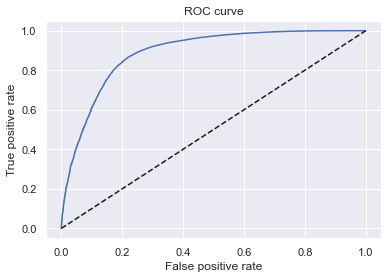

In [42]:
# We plot ROC curve
plt.plot(fpr, tpr)
plt.plot(fpr, fpr, linestyle = '--', color = 'k')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve');

In [43]:
# Calculates the Area Under the Receiver Operating Characteristic Curve (AUROC)
# from a set of actual values and their predicted probabilities.
AUROC = roc_auc_score(df_actual_predicted_probs['loan_data_targets_test'], df_actual_predicted_probs['y_hat_test_proba'])
AUROC

0.8881520791820066

## Gini and Kolmogorov-Smirnov

In [44]:
df_actual_predicted_probs = df_actual_predicted_probs.sort_values('y_hat_test_proba')
df_actual_predicted_probs = df_actual_predicted_probs.reset_index()
df_actual_predicted_probs['Cumulative N Population'] = df_actual_predicted_probs.index + 1
# We calculate the cumulative number of all observations.
# We use the new index for that. Since indexing in ython starts from 0, we add 1 to each index.
df_actual_predicted_probs['Cumulative N Good'] = df_actual_predicted_probs['loan_data_targets_test'].cumsum()
# We calculate cumulative number of 'good', which is the cumulative sum of the column with actual observations.
df_actual_predicted_probs['Cumulative N Bad'] = df_actual_predicted_probs['Cumulative N Population'] - df_actual_predicted_probs['loan_data_targets_test'].cumsum()
# We calculate the cumulative percentage of all observations.
df_actual_predicted_probs['Cumulative Perc Population'] = df_actual_predicted_probs['Cumulative N Population'] / (df_actual_predicted_probs.shape[0])
# We calculate cumulative percentage of 'good'.
df_actual_predicted_probs['Cumulative Perc Good'] = df_actual_predicted_probs['Cumulative N Good'] / df_actual_predicted_probs['loan_data_targets_test'].sum()
# We calculate the cumulative percentage of 'bad'.
df_actual_predicted_probs['Cumulative Perc Bad'] = df_actual_predicted_probs['Cumulative N Bad'] / (df_actual_predicted_probs.shape[0] - df_actual_predicted_probs['loan_data_targets_test'].sum())

In [45]:
df_actual_predicted_probs.tail()

,index,loan_data_targets_test,y_hat_test_proba,Cumulative N Population,Cumulative N Good,Cumulative N Bad,Cumulative Perc Population,Cumulative Perc Good,Cumulative Perc Bad
93252,231255,1,0.999773,93253,82816,10437,0.999957,0.999952,1.0
93253,236491,1,0.999792,93254,82817,10437,0.999968,0.999964,1.0
93254,249861,1,0.999804,93255,82818,10437,0.999979,0.999976,1.0
93255,232041,1,0.999913,93256,82819,10437,0.999989,0.999988,1.0
93256,339161,1,0.999926,93257,82820,10437,1.000000,1.000000,1.0


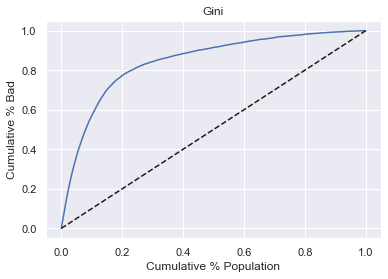

In [46]:
# Plot Gini
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Bad'])
# We plot the cumulative percentage of all along the x-axis and the cumulative percentage 'good' along the y-axis,
# thus plotting the Gini curve.
plt.plot(df_actual_predicted_probs['Cumulative Perc Population'], df_actual_predicted_probs['Cumulative Perc Population'], linestyle = '--', color = 'k')
# We plot a seconary diagonal line, with dashed line style and black color.
plt.xlabel('Cumulative % Population')
plt.ylabel('Cumulative % Bad')
plt.title('Gini');

In [47]:
# Here we calculate Gini from AUROC.
Gini = AUROC * 2 - 1
Gini

0.7763041583640131

The Gini coefficient measures separation power. Similar to how it is used in economics to measure inequality. However for credit risk, the higher the Gini, the better. It means, among the good ratings and bad ratings, the separation is good. Also known as discriminatory power. Or good borrowers and risky borrowers are "unequal"
As closer as our model’s ROC AUC is from 1, the better it is in separating classes and making better predictions. Here 0.88 is quite high.

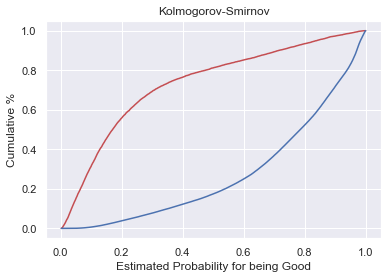

In [48]:
# Plot KS
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Bad'], color = 'r')
# We plot the predicted probabilities along the x-axis and the cumulative percentage 'bad' along the y-axis,
# colored in red.
plt.plot(df_actual_predicted_probs['y_hat_test_proba'], df_actual_predicted_probs['Cumulative Perc Good'], color = 'b')
# We plot the predicted probabilities along the x-axis and the cumulative percentage 'good' along the y-axis,
# colored in red.
plt.xlabel('Estimated Probability for being Good')
plt.ylabel('Cumulative %')
plt.title('Kolmogorov-Smirnov');

In [49]:
KS = max(df_actual_predicted_probs['Cumulative Perc Bad'] - df_actual_predicted_probs['Cumulative Perc Good'])
# We calculate KS from the data. It is the maximum of the difference between the cumulative percentage of 'bad'
# and the cumulative percentage of 'good'.
KS

0.6460925752766389

It is clear to see that there is a separation in  between creditworthy and risky borrowers with the value of KS 0.64 is quite high.

# Creating a scorecard

In [50]:
summary_table

,Feature name,Coefficients,p_values
0,Intercept,0.224001,NaN
1,grade:A,0.644440,1.726639e-18
2,grade:B,0.579854,8.112396e-21
3,grade:C,0.512925,5.127485e-18
4,grade:D,0.474767,1.147670e-16
5,grade:E,0.341058,1.109140e-10
6,grade:F,0.190705,5.690216e-04
7,home_ownership:OWN,0.053929,9.056028e-04
8,home_ownership:MORTGAGE,0.070356,2.694961e-09
9,verification_status:Source Verified,-0.279713,4.405778e-128


In [51]:
ref_categories

['grade:G',
 'home_ownership:RENT_OTHER_NONE_ANY',
 'verification_status:Not Verified',
 'purpose:educ__sm_b__ren_en__mov__house',
 'addr_state:ND_NE_IA_NV_FL_AL_HI',
 'initial_list_status:f',
 'term:60',
 'emp_length:0',
 'months_since_issue_d:>84',
 'months_since_earliest_cr_line:<144',
 'int_rate:>20.281',
 'inq_last_6mths:>6',
 'pub_rec:>=6',
 'total_acc:> 51',
 'total_rev_hi_lim:<=5K',
 'annual_inc:<23K',
 'mths_since_last_delinq:0-3',
 'dti:>35',
 'total_pymnt:<=6K',
 'out_prncp:<=1286',
 'months_since_last_credit_pull_d:23',
 'revol_util:<10',
 'tot_cur_bal:<=76800',
 'total_rec_int:<=400']

In [52]:
# We create a new dataframe with one column. Its values are the values from the 'reference_categories' list.
# We name it 'Feature name'.
df_ref_categories = pd.DataFrame(ref_categories, columns = ['Feature name'])
df_ref_categories['Coefficients'] = 0
df_ref_categories['p_values'] = np.nan

# Concatenates two dataframes.
df_scorecard = pd.concat([summary_table, df_ref_categories], axis =0)
df_scorecard = df_scorecard.reset_index()

# We create a new column, called 'Original feature name', which contains the value of the 'Feature name' column,
# up to the column symbol.
df_scorecard['Original feature name'] = df_scorecard['Feature name'].str.split(':').str[0]
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name
0,0,Intercept,0.224001,NaN,Intercept
1,1,grade:A,0.644440,1.726639e-18,grade
2,2,grade:B,0.579854,8.112396e-21,grade
3,3,grade:C,0.512925,5.127485e-18,grade
4,4,grade:D,0.474767,1.147670e-16,grade
5,5,grade:E,0.341058,1.109140e-10,grade
6,6,grade:F,0.190705,5.690216e-04,grade
7,7,home_ownership:OWN,0.053929,9.056028e-04,home_ownership
8,8,home_ownership:MORTGAGE,0.070356,2.694961e-09,home_ownership
9,9,verification_status:Source Verified,-0.279713,4.405778e-128,verification_status


In [53]:
# In order to create a scorecard, we will use the FICO® scoring range, which spans 300 to 850
# (300 - the worst 
# (850 - thbest)
min_score = 300
max_score = 850

In [54]:
min_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].min().sum()
max_sum_coef = df_scorecard.groupby('Original feature name')['Coefficients'].max().sum()

In [55]:
# We multiply the value of the 'Coefficients' column by the ration of the differences between
# maximum score and minimum score and maximum sum of coefficients and minimum sum of cefficients.
df_scorecard['Score - Calculation'] = df_scorecard['Coefficients'] * (max_score - min_score) / (max_sum_coef - min_sum_coef)

In [56]:
# We transform the intercept to the score
# We divide the difference of the value of the 'Coefficients' column and the minimum sum of coefficients by
# the difference of the maximum sum of coefficients and the minimum sum of coefficients.
# Then, we multiply that by the difference between the maximum score and the minimum score.
# Then, we add minimum score. 
df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score

/var/folders/zm/72p9tz5s3vsdp0s6yk0nvbzh0000gn/T/ipykernel_80828/3733419044.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Calculation'][0] = ((df_scorecard['Coefficients'][0] - min_sum_coef) / (max_sum_coef - min_sum_coef)) * (max_score - min_score) + min_score


In [57]:
df_scorecard['Score - Preliminary'] = df_scorecard['Score - Calculation'].round()
# We round the values of the 'Score - Calculation' column.
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary
0,0,Intercept,0.224001,NaN,Intercept,519.075040,519.0
1,1,grade:A,0.644440,1.726639e-18,grade,11.507019,12.0
2,2,grade:B,0.579854,8.112396e-21,grade,10.353787,10.0
3,3,grade:C,0.512925,5.127485e-18,grade,9.158708,9.0
4,4,grade:D,0.474767,1.147670e-16,grade,8.477369,8.0
5,5,grade:E,0.341058,1.109140e-10,grade,6.089879,6.0
6,6,grade:F,0.190705,5.690216e-04,grade,3.405197,3.0
7,7,home_ownership:OWN,0.053929,9.056028e-04,home_ownership,0.962939,1.0
8,8,home_ownership:MORTGAGE,0.070356,2.694961e-09,home_ownership,1.256267,1.0
9,9,verification_status:Source Verified,-0.279713,4.405778e-128,verification_status,-4.994504,-5.0


In [58]:
min_max_score_prel = df_scorecard.groupby('Original feature name')['Score - Preliminary'].agg(['min','max']).sum()
min_max_score_prel

min    301.0
max    848.0
dtype: float64

There is a slight distinction in the pre-setup minimum and maximum scores due to rounding. The approach involves identifying the highest rounded score in min_coef and in max_coef and then adjusting them.

In [59]:
min_score_df = df_scorecard.groupby('Original feature name')['Score - Preliminary'].min().reset_index()
min_score_merge = min_score_df.merge(df_scorecard, on = ['Original feature name','Score - Preliminary'], how = 'left')
min_score_merge['Difference'] = min_score_merge['Score - Preliminary'] - min_score_merge['Score - Calculation']
min_score_merge.loc[min_score_merge['Difference'].nlargest(1).index]

,Original feature name,Score - Preliminary,index,Feature name,Coefficients,p_values,Score - Calculation,Difference
30,verification_status,-8.0,10,verification_status:Verified,-0.470619,0.0,-8.403289,0.403289


In [60]:
df_scorecard['Score - Final'] = df_scorecard['Score - Preliminary']
df_scorecard['Score - Final'][10] = -9

/var/folders/zm/72p9tz5s3vsdp0s6yk0nvbzh0000gn/T/ipykernel_80828/4212597492.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Final'][10] = -9


In [61]:
max_score_df = df_scorecard.groupby('Original feature name')['Score - Preliminary'].max().reset_index()
max_score_merge = max_score_df.merge(df_scorecard, on = ['Original feature name','Score - Preliminary'], how = 'left')
max_score_merge['Difference'] = max_score_merge['Score - Calculation'] - max_score_merge['Score - Preliminary']
max_score_merge.loc[max_score_merge['Difference'].nlargest(2).index]

,Original feature name,Score - Preliminary,index,Feature name,Coefficients,p_values,Score - Calculation,Score - Final,Difference
1,addr_state,8.0,23,addr_state:WV_WY_DC_ME,0.473408,6.555052e-25,8.453091,8.0,0.453091
19,out_prncp,52.0,96,out_prncp:10291-15437,2.937478,0.000000e+00,52.451132,52.0,0.451132


In [62]:
df_scorecard['Score - Final'][23] = 9
df_scorecard['Score - Final'][96] = 53

/var/folders/zm/72p9tz5s3vsdp0s6yk0nvbzh0000gn/T/ipykernel_80828/688026986.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Final'][23] = 9
/var/folders/zm/72p9tz5s3vsdp0s6yk0nvbzh0000gn/T/ipykernel_80828/688026986.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_scorecard['Score - Final'][96] = 53


In [63]:
df_scorecard

,index,Feature name,Coefficients,p_values,Original feature name,Score - Calculation,Score - Preliminary,Score - Final
0,0,Intercept,0.224001,NaN,Intercept,519.075040,519.0,519.0
1,1,grade:A,0.644440,1.726639e-18,grade,11.507019,12.0,12.0
2,2,grade:B,0.579854,8.112396e-21,grade,10.353787,10.0,10.0
3,3,grade:C,0.512925,5.127485e-18,grade,9.158708,9.0,9.0
4,4,grade:D,0.474767,1.147670e-16,grade,8.477369,8.0,8.0
5,5,grade:E,0.341058,1.109140e-10,grade,6.089879,6.0,6.0
6,6,grade:F,0.190705,5.690216e-04,grade,3.405197,3.0,3.0
7,7,home_ownership:OWN,0.053929,9.056028e-04,home_ownership,0.962939,1.0,1.0
8,8,home_ownership:MORTGAGE,0.070356,2.694961e-09,home_ownership,1.256267,1.0,1.0
9,9,verification_status:Source Verified,-0.279713,4.405778e-128,verification_status,-4.994504,-5.0,-5.0


In [64]:
min_max_score_prel = df_scorecard.groupby('Original feature name')['Score - Final'].agg(['min','max']).sum()
min_max_score_prel
# Now we have the correct range

min    300.0
max    850.0
dtype: float64

# Caclulating Credit Score

In [65]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat

In [66]:
# We insert a column in the dataframe, with an index of 0, that is, in the beginning of the dataframe.
# The name of that column is 'Intercept', and its values are 1s.
inputs_test_with_ref_cat_w_intercept.insert(0, 'Intercept', 1)

In [67]:
inputs_test_with_ref_cat_w_intercept = inputs_test_with_ref_cat_w_intercept[df_scorecard['Feature name'].values]
# Here, from the 'inputs_test_with_ref_cat_w_intercept' dataframe, we keep only the columns with column names,
# exactly equal to the row values of the 'Feature name' column from the 'df_scorecard' dataframe.

In [68]:
inputs_test_with_ref_cat_w_intercept.head()

,Intercept,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:OWN,home_ownership:MORTGAGE,verification_status:Source Verified,...,total_rev_hi_lim:<=5K,annual_inc:<23K,mths_since_last_delinq:0-3,dti:>35,total_pymnt:<=6K,out_prncp:<=1286,months_since_last_credit_pull_d:23,revol_util:<10,tot_cur_bal:<=76800,total_rec_int:<=400
412107,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
236325,1,0,1,0,0,0,0,0,1,1,...,0,0,0,0,0,0,1,0,0,0
273782,1,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0
59975,1,1,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,1,0,1,0
189031,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [69]:
scorecard_scores = df_scorecard['Score - Final']

In [70]:
scorecard_scores.shape

(156,)

In [71]:
scorecard_scores = scorecard_scores.values.reshape(156, 1)

In [72]:
# Here we multiply the values of each row of the dataframe by the values of each column of the variable,
# which is an argument of the 'dot' method, and sum them. It's essentially the sum of the products.
y_scores = inputs_test_with_ref_cat_w_intercept.dot(scorecard_scores)

In [73]:
y_scores.describe()

,0
count,93257.000000
mean,534.282681
std,32.629752
min,404.000000
25%,515.000000
50%,535.000000
75%,555.000000
max,684.000000


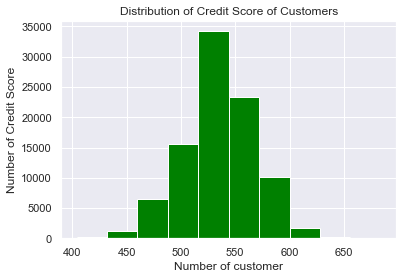

In [74]:
plt.hist(y_scores, color ='green')
plt.xlabel('Number of customer')
plt.ylabel('Number of Credit Score')
plt.title('Distribution of Credit Score of Customers');